# <font color="red"> MBA em IA e Big Data</font>
## <span style="color:red">Curso 2 - Ciência de Dados, Aprendizado de Máquina e Mineração de Dados</span>

### <span style="color:darkred">Mineração de Dados</span>

#### Material de Apoio - Prática sobre Classificação com kNN (ver Vídeo)

*Ricardo M. Marcacini*<br>
*ICMC/USP São Carlos*

# Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,plot_confusion_matrix,confusion_matrix
from sklearn import preprocessing
import numpy as np
from sklearn.dummy import DummyClassifier

# Leitura da Base de Dados

O banco de dados contém 14 atributos com base em testes físicos de um paciente. Amostras de sangue foram coletadas e o paciente também realizou um breve teste de esforço. O atributo "target" refere-se à presença de doença cardíaca no paciente (classe). É um número inteiro (0 para nenhuma presença, 1 para presença).

Em geral, confirmar 100% se um paciente tem doença cardíaca pode ser um processo bastante invasivo, portanto, se pudermos criar um modelo que preveja com precisão a probabilidade de doença cardíaca, podemos ajudar a evitar procedimentos caros e invasivos.


* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise * relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Referência: Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.

In [ ]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Analisando atributos

Verificar relações simples entre atributos e a classe.

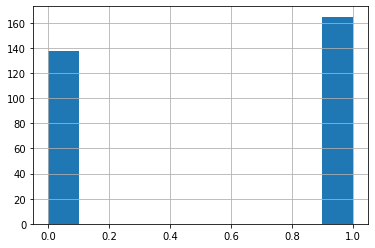

In [ ]:
df.target.hist() # verificando balanceamento da base de dados

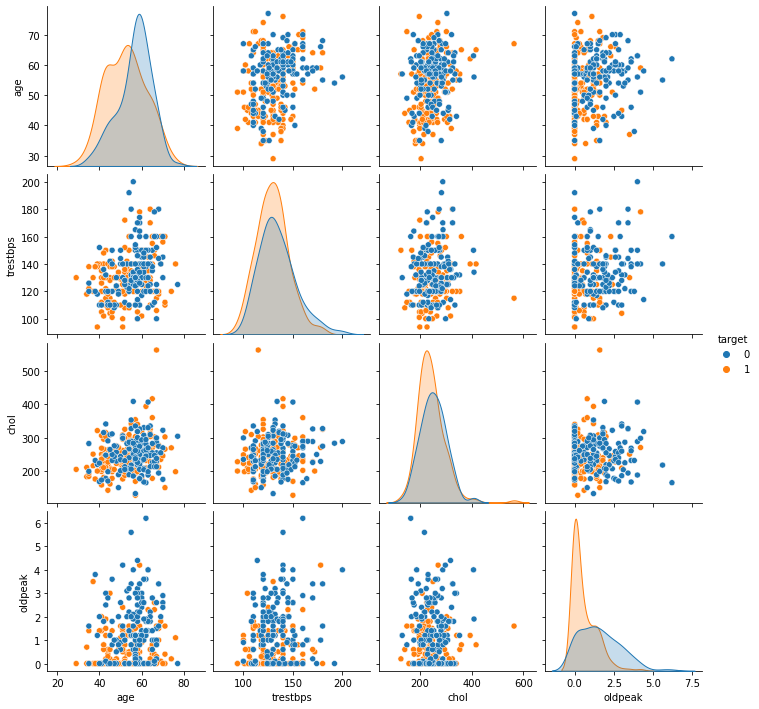

In [ ]:
sns.pairplot(df[['age','trestbps','chol','oldpeak','target']], hue='target')
plt.show()

# Classificação kNN

Dividindo o conjunto de dados em treino (70%) e teste (30%).

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

In [ ]:
df_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2,1
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0


In [ ]:
df_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
143,67,0,0,106,223,0,1,142,0,0.3,2,2,2,1
79,58,1,2,105,240,0,0,154,1,0.6,1,0,3,1


Preparando o classificador kNN
* k=7
* Distância Euclidiana
* Votação majoritária

In [ ]:
# estamos explicitamente selecionando os atributos de interesse
knn = KNeighborsClassifier(n_neighbors=7)
X_train = df_train[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
y_train = df_train[['target']]
knn.fit(X_train, y_train)

X_test = df_test[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
y_test = df_test[['target']]

y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.59      0.62        41
           1       0.69      0.74      0.71        50

    accuracy                           0.67        91
   macro avg       0.67      0.66      0.66        91
weighted avg       0.67      0.67      0.67        91



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


In [ ]:
# Classificador nulo que apenas chuta uma resposta considerando a distribuições das classes
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_train,y_train)
print(classification_report(y_test, dummy_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.39      0.32      0.35        41
           1       0.52      0.60      0.56        50

    accuracy                           0.47        91
   macro avg       0.46      0.46      0.45        91
weighted avg       0.46      0.47      0.46        91



Comparando com voto ponderado

In [ ]:
knn_ponderado = KNeighborsClassifier(n_neighbors=7,weights='distance')
X_train = df_train[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
y_train = df_train[['target']]
knn_ponderado.fit(X_train, y_train)

y_pred = knn_ponderado.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.59      0.61        41
           1       0.68      0.72      0.70        50

    accuracy                           0.66        91
   macro avg       0.66      0.65      0.65        91
weighted avg       0.66      0.66      0.66        91



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Comparando com padronização de dados

In [ ]:
# preparando scaler para padronizar escala dos dados
# usaremos o conjunto de treino
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(df_train[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']])

# transformar os dados para a nova escala (treino e teste)
df_train_norm = min_max_scaler.transform(df_train[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']])
df_test_norm = min_max_scaler.transform(df_test[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']])

# preparando o knn com voto ponderado
knn_norm = KNeighborsClassifier(n_neighbors=7,weights='distance')

# conjunto de treino
X_train = df_train_norm
y_train = df_train[['target']]
knn_norm.fit(X_train, y_train)

# conjunto de teste
X_test = df_test_norm
y_test = df_test[['target']]

y_pred = knn_norm.predict(X_test)

# comparando desempenho
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.85      0.80        41
           1       0.86      0.76      0.81        50

    accuracy                           0.80        91
   macro avg       0.80      0.81      0.80        91
weighted avg       0.81      0.80      0.80        91



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


# Desafio

Repetir esse procedimento considerando um protocolo de validação cruzada em 10 folds.
* Encontrar o melhor valor de k
* Testar outras medidas de distância